## Question B
Use a linear model with softmax activation to perform the classification.  Use a single layer of 100 neurons for your first attempt.

Use the hold-out cross validation.  Hold out the first 100 images from mnist.train.images.  You can get the hold out validation data using mnist.train.next_batch(100).

### Question B.1
[5] Clearly define the model and the cost function.  To train the network, use batch size of  100 for each epoch.

In [36]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [37]:
# Reset the graph
tf.reset_default_graph()

# Constants
numPixels = 784
numClassifications = 10
rate = 0.2
epochs = 2000
iterationsPerEpoch = 10

# Shape = (N x 784). N images of size 28 pixels by 28 pixels
x = tf.placeholder(tf.float32, [None, numPixels])
# Shape = (N x 10). N images with one hot values indicating if it's 0-9
ref = tf.placeholder(tf.float32, [None, numClassifications])
# Shape = (784 x 10). A weight variable for each pixel indicating the likelihood of it being 0-9.
W = tf.Variable(tf.zeros([784, numClassifications]))
# Shape = (10). The bias variable to offset the likelihood of it being 0-9.
b = tf.Variable(tf.zeros([numClassifications]))
# Shape = (N x 10). The logit values of the likelihood that each image is 0-9.
logits = tf.matmul(x, W) + b

# Convert the logit values into a probability from 0-1 (indicating confidence percentage) for each classification from 0-9
probability = tf.nn.softmax(logits)
# Shape = (N). Take the highest percentile value in the prediction as the neural network's guess
prediction = tf.argmax(probability, axis=1)

# Calculate the cross entropy, doing the softmax function internally
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=ref)
# Take the average of the cross entropy values to determine the overall cost function
cost = tf.reduce_mean(cross_entropy)

# Take the largest 1 hot value for each image's label to get the classification of each image
labels = []
for label in mnist.test.labels:
    labels.append(np.argmax(label))
# Shape = (N). Convert the list into a numpy array for later comparisons
labels = np.array(labels)

# Initialize the optimizer
optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
s = tf.Session()
s.run(tf.global_variables_initializer())

# Initialize values to graph later or use for later calculations
errList = []
validationErrList = []
epochList = []

# Counter to keep track of the number of overall training iterations
count = 0
# Run the training on 2000 different image sets of size 100 
for _ in range(epochs):
    inputData, correctAns = mnist.train.next_batch(100)
    validationInput, validationCorrect = mnist.train.next_batch(100)
    # Run the training on the image set of size 100, 10 times
    for _ in range(iterationsPerEpoch):
        # Do the training
        err, _ = s.run((cost, optimizer), feed_dict={x: inputData, ref: correctAns})

        # Calculate the cross validation error
        validationErr = s.run((cost), feed_dict={x: validationInput, ref: validationCorrect})

        # Add the values to be tracked into their respective lists
        errList.append(err)
        validationErrList.append(validationErr)
        epochList.append(count)
        count += 1
        
# Print done to indicate that the training is done
print("DONE")

DONE


### Question B.2
[5] Plot the training error over the epochs.

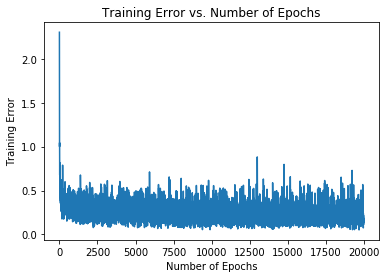

In [38]:
plt.plot(epochList, errList);
plt.ylabel('Training Error')
plt.xlabel('Number of Epochs')
plt.title('Training Error vs. Number of Epochs')
plt.show()

### Question B.3
[5] Plot the cross-validation error over the epochs. Is there overfitting?  Explain.

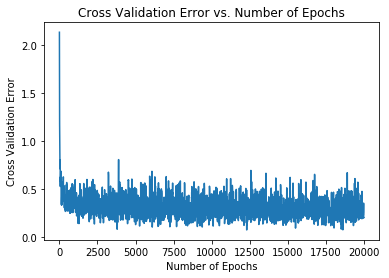

In [39]:
plt.plot(epochList, validationErrList);
plt.ylabel('Cross Validation Error')
plt.xlabel('Number of Epochs')
plt.title('Cross Validation Error vs. Number of Epochs')
plt.show()

There is no evident overfitting error in the above plot, this is because the training data changes every 10 iterations of training. Thus you will not see a very obvious cross validation error (ie. a smooth curve going up) since the amount of training data is huge. However it can be shown in the above graph that the cross validation error goes up and down but there is no consistent increase which would indicate an overfitting error.

### Question B.4
[5] Evaluate and report the test error of the best trained linear model with 10 neurons.  The test data is to be taken from mnist.test.images.

In [40]:
# Get the highest percentile probability value for each image
predic = s.run((prediction), feed_dict={x: mnist.test.images})
# Check if the highest percentile is the same as the correct answer
answers = np.equal(labels, predic)
# Sum the number of correct answers and determine the error
corrGuesses = np.sum(answers)
testErr = corrGuesses / len(answers)
print("The test error for the final iteration of the training is: " + str((1 - testErr) * 100) + "%.")
# Close the current session
s.close()

The test error for the final iteration of the training is: 8.2%.
